# Netflix - Análise exploratória de dados

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

## Lendo arquivo CSV

In [4]:
df_netflix = pd.read_csv("netflix_daily_top_10.csv")
df_netflix

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


## Schema details

In [5]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


## Dados estatísticos - Geral

In [6]:
df_netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


## Dados estatísticos - Total por variável

In [7]:
df_netflix.count()

As of                   7100
Rank                    7100
Year to Date Rank       7100
Last Week Rank          7100
Title                   7100
Type                    7100
Netflix Exclusive       4599
Netflix Release Date    7100
Days In Top 10          7100
Viewership Score        7100
dtype: int64

## Agrupamento

### Coluna - Type

In [8]:
df_netflix.groupby("Type").count()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
Type,,,,,,,,,
Concert/Perf…,2,2,2,2,2,2,2,2,2
Movie,2611,2611,2611,2611,2611,1469,2611,2611,2611
Stand-Up Comedy,41,41,41,41,41,41,41,41,41
TV Show,4446,4446,4446,4446,4446,3087,4446,4446,4446


### Coluna - Netflix Exclusive

A coluna "Netflix Exclusive" possui valores `NaN`. Total de 2.501.

In [9]:
df_netflix["Netflix Exclusive"].isna().sum()

np.int64(2501)

Já o total de `Yes` são `4599`, totalizando 7.100 registros - o número total de linhas do dataset.

Podemos então assumir que os registros que possuem `NaN` são registros que não são exclusivos da Netflix.

In [10]:
df_netflix.groupby("Netflix Exclusive").count()

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Release Date,Days In Top 10,Viewership Score
Netflix Exclusive,,,,,,,,,
Yes,4599,4599,4599,4599,4599,4599,4599,4599,4599


Vamos fazer uma edição em lote e trocar `NaN` por `No`:

In [11]:
df_netflix["Netflix Exclusive"].fillna("No", inplace=True)

/var/folders/qp/skrztx8x5bsd_zvdsjwfxlhr0000gn/T/ipykernel_3426/3602154729.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_netflix["Netflix Exclusive"].fillna("No", inplace=True)


Agora todas as colunas devem ter 7.100 registros:

In [12]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     7100 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


## Distribuição

<Axes: title={'center': 'Netflix Exclusive Content'}>

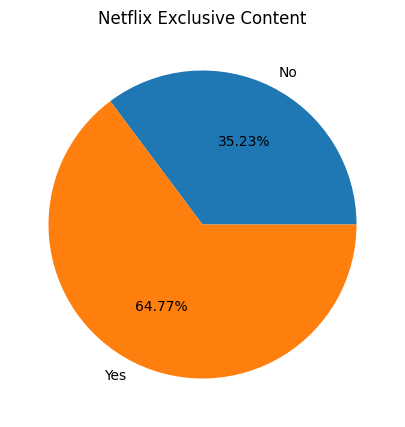

In [15]:
df_netflix.groupby("Netflix Exclusive").size().plot.pie(
    title="Netflix Exclusive Content", 
    figsize=(10, 5),
    autopct='%1.2f%%'
)

## Hipótese #1: Títulos exclusivos netflix possuem melhor nota?

In [18]:
df_titulos_score = df_netflix.groupby("Netflix Exclusive")["Viewership Score"]

### Média por grupo

In [19]:
df_titulos_score.mean()

Netflix Exclusive
No     185.542583
Yes     88.664492
Name: Viewership Score, dtype: float64

### Mediana por grupo

In [20]:
df_titulos_score.median()

Netflix Exclusive
No     44.0
Yes    53.0
Name: Viewership Score, dtype: float64

### Moda por grupo

In [27]:
df_titulos_score.apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

Netflix Exclusive
No      4
Yes    10
Name: Viewership Score, dtype: int64

### Desvio padrão por grupo

In [28]:
df_titulos_score.std()

Netflix Exclusive
No     325.928621
Yes     97.720286
Name: Viewership Score, dtype: float64

### Mínimo por grupo

In [29]:
df_titulos_score.min()

Netflix Exclusive
No     1
Yes    1
Name: Viewership Score, dtype: int64

### Máximo por grupo

In [30]:
df_titulos_score.max()

Netflix Exclusive
No     1474
Yes     536
Name: Viewership Score, dtype: int64

### Gráfico Boxplot

<Axes: title={'center': 'Viewership Score'}, xlabel='Netflix Exclusive'>

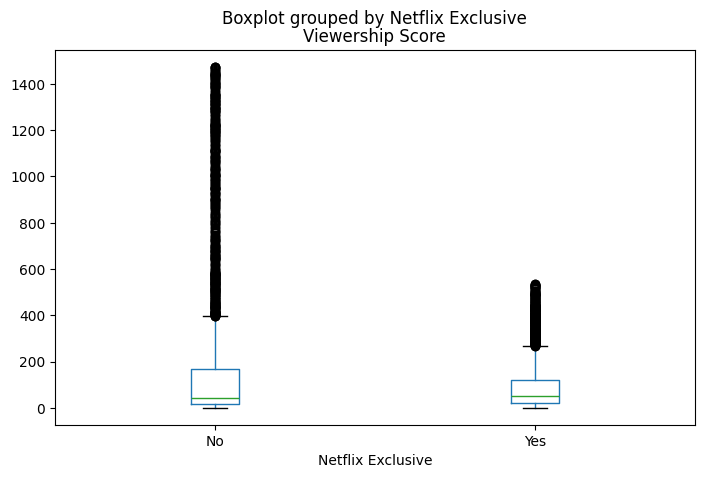

In [31]:
df_netflix.boxplot(
    column="Viewership Score",
    by="Netflix Exclusive",
    figsize=(8, 5),
    grid=False
)

## Análise

### 1. Dispersão muito maior entre os conteúdos não exclusivos

- O grupo "No" (não exclusivos) tem uma distribuição muito mais espalhada, com valores extremos (outliers) que chegam acima de 1400 pontos.

- Isso indica que alguns conteúdos não exclusivos têm audiência extraordinariamente alta, puxando a cauda da distribuição.

### 2. Score mais estável (e concentrado) entre os exclusivos

- O grupo "Yes" (exclusivos da Netflix) tem uma distribuição mais compacta, com menos outliers e menor variabilidade.

- O score dos exclusivos está mais concentrado entre 0 e ~150, com alguns outliers até ~450.

### 3. Mediana maior nos conteúdos exclusivos

- Visualmente, a linha da mediana (linha dentro da caixa) dos conteúdos exclusivos parece mais alta que a dos não exclusivos.

- Isso sugere que, embora os não exclusivos tenham alguns conteúdos com altíssimo desempenho, em média, os exclusivos da Netflix tendem a performar melhor.

### 4. Outliers dos não exclusivos são dominantes

- A quantidade de outliers (pontos pretos) entre os não exclusivos é altíssima.

- Isso pode indicar que há muitos conteúdos medianos ou fracos, mas alguns poucos extremamente populares 

**Filtrar os títulos não exclusivos:**

In [34]:
df_nao_exclusivos = df_netflix[df_netflix["Netflix Exclusive"] == "No"]
df_nao_exclusivos


,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
2,2020-04-01,3,3,2,All American,TV Show,No,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,No,"Mar 26, 2020",5,30
8,2020-04-01,9,8,-,Badland,Movie,No,"Mar 26, 2020",4,11
12,2020-04-02,3,3,2,All American,TV Show,No,"Mar 28, 2019",10,84
15,2020-04-02,6,4,-,Blood Father,Movie,No,"Mar 26, 2020",6,35
...,...,...,...,...,...,...,...,...,...,...
7090,2022-03-11,1,2,-,The Last Kingdom,TV Show,No,"Jul 10, 2016",13,62
7092,2022-03-11,3,3,-,Good Girls,TV Show,No,"Jan 1, 2019",26,149
7097,2022-03-11,8,8,-,Shooter,Movie,No,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,No,"Mar 1, 2022",10,33


**Calcular os limites do boxplot (IQR) para detectar outliers:**

In [35]:
q1 = df_nao_exclusivos["Viewership Score"].quantile(0.25)
q3 = df_nao_exclusivos["Viewership Score"].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr

**Títulos exclusivos:**

In [61]:
df_exclusivos = df_netflix[df_netflix["Netflix Exclusive"] == "Yes"]
df_exclusivos

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
5,2020-04-01,6,6,-,Car Masters: Rust to Riches,TV Show,Yes,"Sep 14, 2018",4,14
6,2020-04-01,7,10,-,Unorthodox,TV Show,Yes,"Mar 26, 2020",2,5
...,...,...,...,...,...,...,...,...,...,...
7091,2022-03-11,2,1,-,Pieces of Her,TV Show,Yes,"Mar 4, 2022",7,68
7093,2022-03-11,4,4,3,Inventing Anna,TV Show,Yes,"Feb 11, 2022",28,250
7094,2022-03-11,5,6,6,Love is Blind,TV Show,Yes,"Feb 13, 2020",46,312
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81


**Identificar os outliers:**

In [60]:
outliers = df_nao_exclusivos[df_nao_exclusivos["Viewership Score"] > limite_superior]

**Quantos são?**

In [67]:
print(f"Total de títulos não exclusivos: {len(df_nao_exclusivos)}")
print(f"Total de outliers: {len(outliers)}")
print(f"Proporção: {(len(outliers) / len(df_nao_exclusivos)):.2%}")

## Média
print("\nMédia")
print(f"Média dos exclusivos: {df_exclusivos["Viewership Score"].mean()}")
print(f"Média não exclusivos: {df_nao_exclusivos["Viewership Score"].mean()}")
print(f"Média de outliers: {outliers["Viewership Score"].mean()}")

## Mediana
print("\nMediana")
print(f"Mediana exclusivos: {df_exclusivos["Viewership Score"].median()}")
print(f"Mediana não exclusivos: {df_nao_exclusivos["Viewership Score"].median()}")
print(f"Mediana de outliers: {outliers["Viewership Score"].median()}")

## Moda
print("\nModa")
print(f"Moda exclusivos: {df_exclusivos["Viewership Score"].mode()}")
print(f"Moda não exclusivos: {df_nao_exclusivos["Viewership Score"].mode()}")
print(f"Moda de outliers: {outliers["Viewership Score"].mode()}")

Total de títulos não exclusivos: 2501
Total de outliers: 363
Proporção: 14.51%

Média
Média dos exclusivos: 88.66449228093063
Média não exclusivos: 185.54258296681328
Média de outliers: 882.5840220385675

Mediana
Mediana exclusivos: 53.0
Mediana não exclusivos: 44.0
Mediana de outliers: 872.0

Moda
Moda exclusivos: 0    10
Name: Viewership Score, dtype: int64
Moda não exclusivos: 0    4
Name: Viewership Score, dtype: int64
Moda de outliers: 0    415
Name: Viewership Score, dtype: int64


In [55]:
# Dados para a tabela
dados_tabela = {
    "Métrica": [
        "Total de títulos",
        "Total de outliers",
        "Proporção de outliers",
        "Média",
        "Mediana",
        "Moda"
    ],
    "Títulos Não Exclusivos": [
        len(df_nao_exclusivos),
        "-",
        "-",
        df_nao_exclusivos["Viewership Score"].mean(),
        df_nao_exclusivos["Viewership Score"].median(),
        df_nao_exclusivos["Viewership Score"].mode().iloc[0] if not df_nao_exclusivos["Viewership Score"].mode().empty else None
    ],
    "Outliers (Alta Visualização)": [
        "-",
        len(outliers),
        f"{(len(outliers) / len(df_nao_exclusivos)):.2%}",
        outliers["Viewership Score"].mean(),
        outliers["Viewership Score"].median(),
        outliers["Viewership Score"].mode().iloc[0] if not outliers["Viewership Score"].mode().empty else None
    ]
}

# Criar DataFrame
df_resumo = pd.DataFrame(dados_tabela)

# Mostrar tabela
print(df_resumo)

                 Métrica Títulos Não Exclusivos Outliers (Alta Visualização)
0       Total de títulos                   2501                            -
1      Total de outliers                      -                          363
2  Proporção de outliers                      -                       14.51%
3                  Média             185.542583                   882.584022
4                Mediana                   44.0                        872.0
5                   Moda                      4                          415


**Ver os títulos com maior score**

In [38]:
outliers.sort_values("Viewership Score", ascending=False).head(10)

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
6998,2022-03-01,9,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",428,1474
6959,2022-02-25,10,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",427,1472
6718,2022-02-01,9,-,7,Cocomelon,TV Show,No,"Jun 1, 2020",426,1471
6687,2022-01-29,8,5,8,Cocomelon,TV Show,No,"Jun 1, 2020",425,1469
6674,2022-01-28,5,6,-,Cocomelon,TV Show,No,"Jun 1, 2020",424,1466
6665,2022-01-27,6,6,-,Cocomelon,TV Show,No,"Jun 1, 2020",423,1460
6655,2022-01-26,6,7,-,Cocomelon,TV Show,No,"Jun 1, 2020",422,1455
6646,2022-01-25,7,10,-,Cocomelon,TV Show,No,"Jun 1, 2020",421,1450
6639,2022-01-24,10,-,-,Cocomelon,TV Show,No,"Jun 1, 2020",420,1446
6617,2022-01-22,8,-,10,Cocomelon,TV Show,No,"Jun 1, 2020",419,1445


**Ver gráfico de distribuição dos outliers**

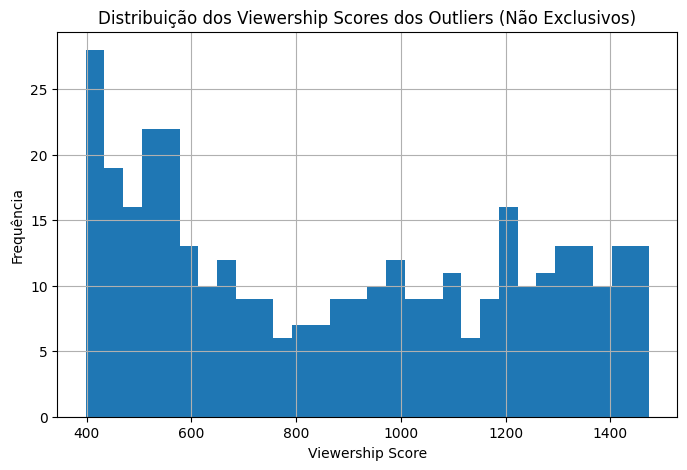

In [39]:
outliers["Viewership Score"].hist(bins=30, figsize=(8,5))
plt.title("Distribuição dos Viewership Scores dos Outliers (Não Exclusivos)")
plt.xlabel("Viewership Score")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()

**Comparar a média com e sem os outliers:**

In [56]:
sem_outliers = df_nao_exclusivos[df_nao_exclusivos["Viewership Score"] <= limite_superior]
media_sem_outliers = sem_outliers["Viewership Score"].mean()
print(f"Média sem outliers: {media_sem_outliers}")

Média sem outliers: 67.1955098222638


**Visualizar com histograma com e sem outliers:**

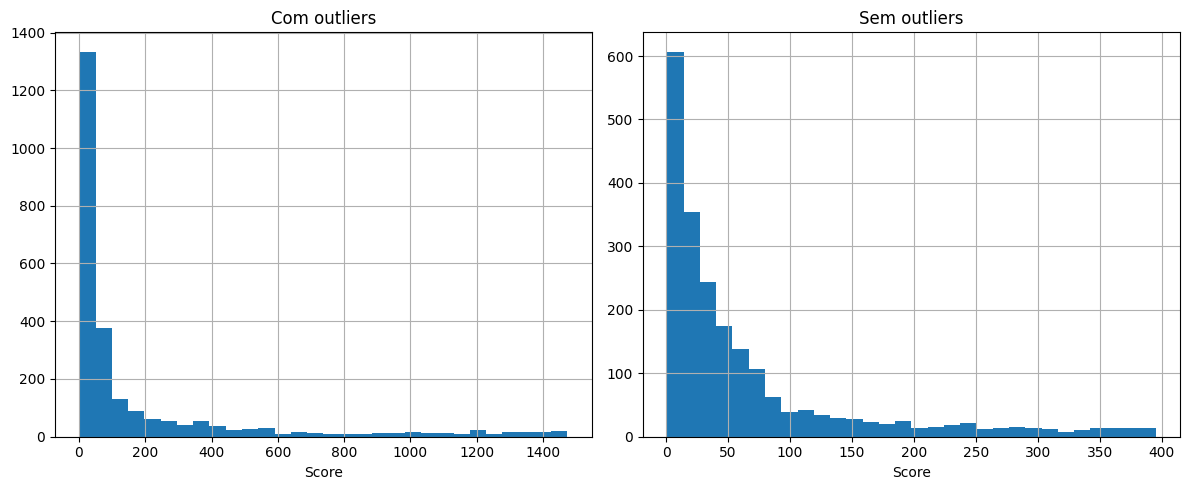

In [57]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_nao_exclusivos["Viewership Score"].hist(bins=30)
plt.title("Com outliers")
plt.xlabel("Score")

plt.subplot(1, 2, 2)
sem_outliers["Viewership Score"].hist(bins=30)
plt.title("Sem outliers")
plt.xlabel("Score")

plt.tight_layout()
plt.show()